In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv("Carseats.csv")

In [3]:
data.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.describe()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
Y = data['Sales']

In [6]:
X = data[['Price','US','Urban','Sales']]

In [7]:
X

,Price,US,Urban,Sales
0,120,Yes,Yes,9.50
1,83,Yes,Yes,11.22
2,80,Yes,Yes,10.06
3,97,Yes,Yes,7.40
4,128,No,Yes,4.15
...,...,...,...,...
395,128,Yes,Yes,12.57
396,120,Yes,No,6.14
397,159,Yes,Yes,7.41
398,95,Yes,Yes,5.94


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   400 non-null    int64  
 1   US      400 non-null    object 
 2   Urban   400 non-null    object 
 3   Sales   400 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.6+ KB


<AxesSubplot:title={'center':'Sales'}, xlabel='Urban'>

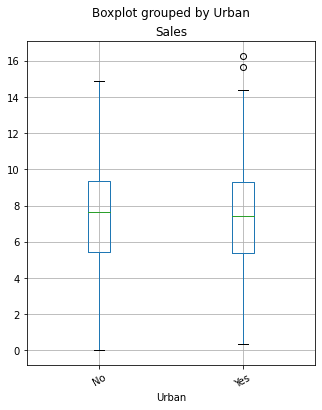

In [9]:
data.boxplot('Sales','Urban',rot = 30,figsize=(5,6))

In [10]:
print(X['Urban'].value_counts())

Yes    282
No     118
Name: Urban, dtype: int64


In [11]:
print(X['US'].value_counts())

Yes    258
No     142
Name: US, dtype: int64


In [12]:
replace_map = {'US':{'Yes':1,'No':0}}

In [13]:
X.replace(replace_map, inplace=True)

C:\Users\ABC\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [14]:
replace_map = {'Urban':{'Yes':1,'No':0}}

In [15]:
X.replace(replace_map, inplace=True)

In [16]:
X

,Price,US,Urban,Sales
0,120,1,1,9.50
1,83,1,1,11.22
2,80,1,1,10.06
3,97,1,1,7.40
4,128,0,1,4.15
...,...,...,...,...
395,128,1,1,12.57
396,120,1,0,6.14
397,159,1,1,7.41
398,95,1,1,5.94


In [17]:
X = X.drop("Sales", axis=1)

In [18]:
X

,Price,US,Urban
0,120,1,1
1,83,1,1
2,80,1,1
3,97,1,1
4,128,0,1
...,...,...,...
395,128,1,1
396,120,1,0
397,159,1,1
398,95,1,1


## part(a)

In [19]:
model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()       

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        22:36:01   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

## part(c)

In [20]:
print('''Model in equation form :
Sales = 13.0435 - 0.0545*Price + US*1.2006 - Urban*0.0219

If US is yes then 1 otherwise 0 similarly for the Urban''')

Model in equation form :
Sales = 13.0435 - 0.0545*Price + US*1.2006 - Urban*0.0219

If US is yes then 1 otherwise 0 similarly for the Urban


## part(d) for price and US null hypothesis can be rejected

<AxesSubplot:xlabel='Urban', ylabel='Sales'>

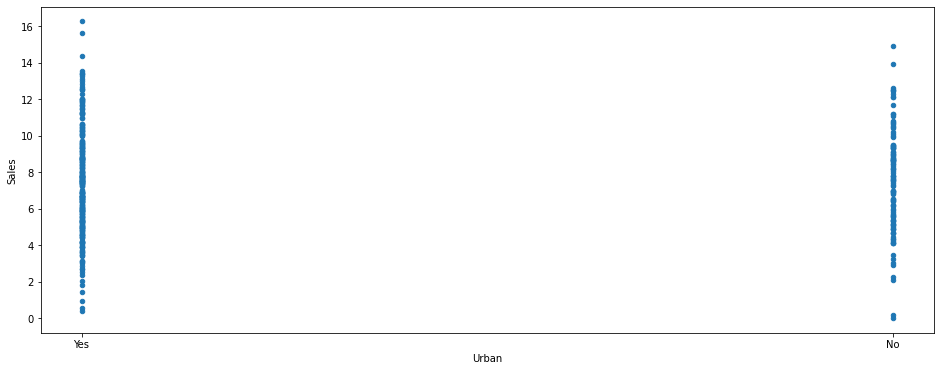

In [21]:
data.plot(kind='scatter', x='Urban', y='Sales' , figsize=(16,6))

In [22]:
R = X.drop('Urban', axis=1)

In [23]:
R

,Price,US
0,120,1
1,83,1
2,80,1
3,97,1
4,128,0
...,...,...
395,128,1
396,120,1
397,159,1
398,95,1


## part(e)

In [24]:
model = sm.OLS(Y, sm.add_constant(R))
model_fit1 = model.fit()       

print(model_fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           2.66e-24
Time:                        22:36:02   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

## part(g) confidence interval from model from(e)

In [25]:
model_fit1.conf_int()

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


## part(h) yes there are outliers and high leverage observations in the model from(e)

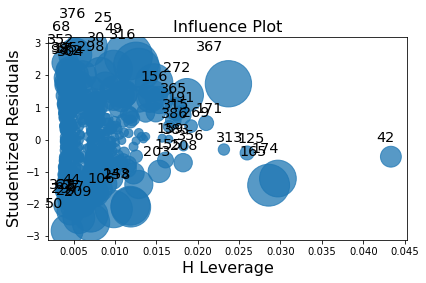

In [26]:
fig = sm.graphics.influence_plot(model_fit1, criterion="cooks")
fig.tight_layout(pad=1.0)